Probability that a randomly chosen man has height between 162 cm and 190 cm: 0.0000


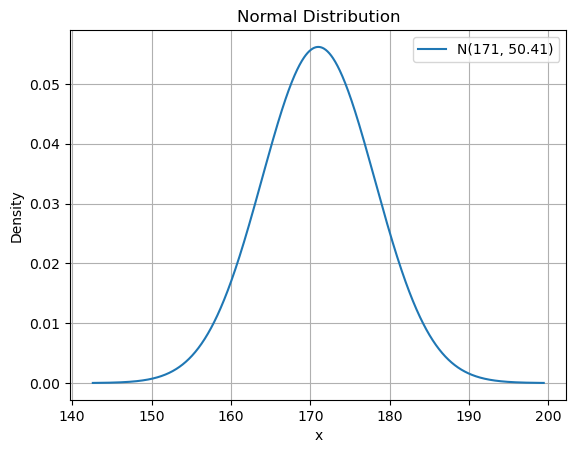

Expected value for uniform distribution on [0, 10]: 5.0
Expected value for exponential distribution with lambda=0.02: 50.0
Expected dosage for male height distribution: 0.0000


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

def normal_density(mean, variance, x):
    sigma = np.sqrt(variance)
    return (1 / (np.sqrt(2 * np.pi * sigma**2))) * np.exp(-((x - mean) ** 2) / (2 * sigma**2))

# Function to plot the normal density function
def plot_normal_density(mean, variance):
    x_values = np.linspace(mean - 4*np.sqrt(variance), mean + 4*np.sqrt(variance), 1000)
    y_values = [normal_density(mean, variance, x) for x in x_values]
    
    plt.plot(x_values, y_values, label=f"N({mean}, {variance})")
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.title("Normal Distribution")
    plt.legend()
    plt.grid()
    plt.show()

def integration(mean, variance, a, b):
    result, _ = integrate.quad(normal_density, a, b, args=(mean, variance))
    return result

# Expected value for uniform distribution E[X] = (a + b) / 2
def uniform_expectation(a, b):
    return (a + b) / 2

# Expected value for exponential distribution E[X] = 1 / lambda
def exponential_expectation(lmbda):
    return 1 / lmbda

# Expected dosage calculation for male height
def expected_dosage(mean, variance):
    dosage_function = lambda x: 2.38 * x**2 * normal_density(mean, variance, x)
    result, _ = integrate.quad(dosage_function, -np.inf, np.inf)
    return result

# Given data: Male height distribution
mu = 171  # Mean height in cm
sigma_sq = 7.1**2  # Variance

# Probability that a randomly chosen man has a height between 162 cm and 190 cm
probability = integration(mu, sigma_sq, 162, 190)
print(f"Probability that a randomly chosen man has height between 162 cm and 190 cm: {probability:.4f}")

# Plot the normal distribution for male height
plot_normal_density(mu, sigma_sq)

# Compute expectations
uniform_a, uniform_b = 0, 10  # Example interval for uniform distribution
print(f"Expected value for uniform distribution on [{uniform_a}, {uniform_b}]: {uniform_expectation(uniform_a, uniform_b)}")

lambda_exp = 1/50  # Example rate for exponential distribution
print(f"Expected value for exponential distribution with lambda={lambda_exp}: {exponential_expectation(lambda_exp)}")

# Compute expected dosage
avg_dosage = expected_dosage(mu, sigma_sq)
print(f"Expected dosage for male height distribution: {avg_dosage:.4f}")
